<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(_2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2_n20.csv',
 'data_multi_delta_-2_n30.csv',
 'data_multi_delta_-2_n60.csv',
 'data_multi_delta_-2_n120.csv',
 'data_multi_delta_-2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,40.260687,43.534300,86.198841,0.039176,180.033003,179.993492,0.039512
1,0.0,1.0,88.552522,91.323850,57.534487,0.006532,247.417390,247.408032,0.009358
2,0.0,2.0,44.876406,42.842625,90.353718,-0.029975,188.042775,188.071071,-0.028296
3,0.0,3.0,89.230526,68.793667,74.504795,-0.024422,242.504565,242.523948,-0.019383
4,0.0,4.0,64.988512,64.278988,66.324720,-0.002058,205.590162,205.591910,-0.001748
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,59.989081,48.525896,86.998446,0.002229,205.515652,205.521785,-0.006133
59996,999.0,56.0,70.698031,42.051896,86.511191,-0.040327,209.220790,209.272401,-0.051611
59997,999.0,57.0,40.500473,69.673048,41.495914,0.011698,161.681133,161.668770,0.012363
59998,999.0,58.0,91.338599,53.635440,33.198602,0.010151,188.182791,188.183076,-0.000285


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,40.260687,43.534300,86.198841,0.039176,180.033003,179.993492,0.039512
1,0.0,1.0,88.552522,91.323850,57.534487,0.006532,247.417390,247.408032,0.009358
2,0.0,2.0,44.876406,42.842625,90.353718,-0.029975,188.042775,188.071071,-0.028296
3,0.0,3.0,89.230526,68.793667,74.504795,-0.024422,242.504565,242.523948,-0.019383
4,0.0,4.0,64.988512,64.278988,66.324720,-0.002058,205.590162,205.591910,-0.001748
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,59.989081,48.525896,86.998446,0.002229,205.515652,205.521785,-0.006133
59996,999.0,56.0,70.698031,42.051896,86.511191,-0.040327,209.220790,209.272401,-0.051611
59997,999.0,57.0,40.500473,69.673048,41.495914,0.011698,161.681133,161.668770,0.012363
59998,999.0,58.0,91.338599,53.635440,33.198602,0.010151,188.182791,188.183076,-0.000285


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    40.260687  43.534300  86.198841  0.039176  180.033003   
      1.0    88.552522  91.323850  57.534487  0.006532  247.417390   
      2.0    44.876406  42.842625  90.353718 -0.029975  188.042775   
      3.0    89.230526  68.793667  74.504795 -0.024422  242.504565   
      4.0    64.988512  64.278988  66.324720 -0.002058  205.590162   
...                ...        ...        ...       ...         ...   
999.0 55.0   59.989081  48.525896  86.998446  0.002229  205.515652   
      56.0   70.698031  42.051896  86.511191 -0.040327  209.220790   
      57.0   40.500473  69.673048  41.495914  0.011698  161.681133   
      58.0   91.338599  53.635440  33.198602  0.010151  188.182791   
      59.0   22.341381  70.114102  21.802405 -0.000291  124.257596   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    179.993492  0.039512  
      1.0    247.408032  0.009358  
      2.0    188.071071 -0.028296  
      3.0    242.523948 -0.019383  
      4.0    205.591910 -0.001748  
...                 ...       ...  
999.0 55.0   205.521785 -0.006133  
      56.0   209.272401 -0.051611  
      57.0   161.668770  0.012363  
      58.0   188.183076 -0.000285  
      59.0   124.253122  0.004474  

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    40.260687  43.534300  86.198841  0.039176  180.033003   
      1.0    88.552522  91.323850  57.534487  0.006532  247.417390   
      2.0    44.876406  42.842625  90.353718 -0.029975  188.042775   
      3.0    89.230526  68.793667  74.504795 -0.024422  242.504565   
      4.0    64.988512  64.278988  66.324720 -0.002058  205.590162   
...                ...        ...        ...       ...         ...   
999.0 55.0   59.989081  48.525896  86.998446  0.002229  205.515652   
      56.0   70.698031  42.051896  86.511191 -0.040327  209.220790   
      57.0   40.500473  69.673048  41.495914  0.011698  161.681133   
      58.0   91.338599  53.635440  33.198602  0.010151  188.182791   
      59.0   22.341381  70.114102  21.802405 -0.000291  124.257596   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    179.993492  0.039512  
      1.0    247.408032  0.009358  
      2.0    188.071071 -0.028296  
      3.0    242.523948 -0.019383  
      4.0    205.591910 -0.001748  
...                 ...       ...  
999.0 55.0   205.521785 -0.006133  
      56.0   209.272401 -0.051611  
      57.0   161.668770  0.012363  
      58.0   188.183076 -0.000285  
      59.0   124.253122  0.004474  

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,40.260687,43.534300,86.198841,0.039176,180.033003,179.993492,0.039512
1,0.0,1.0,88.552522,91.323850,57.534487,0.006532,247.417390,247.408032,0.009358
2,0.0,2.0,44.876406,42.842625,90.353718,-0.029975,188.042775,188.071071,-0.028296
3,0.0,3.0,89.230526,68.793667,74.504795,-0.024422,242.504565,242.523948,-0.019383
4,0.0,4.0,64.988512,64.278988,66.324720,-0.002058,205.590162,205.591910,-0.001748
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,59.989081,48.525896,86.998446,0.002229,205.515652,205.521785,-0.006133
59996,999.0,56.0,70.698031,42.051896,86.511191,-0.040327,209.220790,209.272401,-0.051611
59997,999.0,57.0,40.500473,69.673048,41.495914,0.011698,161.681133,161.668770,0.012363
59998,999.0,58.0,91.338599,53.635440,33.198602,0.010151,188.182791,188.183076,-0.000285


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    40.260687  43.534300  86.198841  0.039176  180.033003   
      1.0    88.552522  91.323850  57.534487  0.006532  247.417390   
      2.0    44.876406  42.842625  90.353718 -0.029975  188.042775   
      3.0    89.230526  68.793667  74.504795 -0.024422  242.504565   
      4.0    64.988512  64.278988  66.324720 -0.002058  205.590162   
...                ...        ...        ...       ...         ...   
999.0 55.0   59.989081  48.525896  86.998446  0.002229  205.515652   
      56.0   70.698031  42.051896  86.511191 -0.040327  209.220790   
      57.0   40.500473  69.673048  41.495914  0.011698  161.681133   
      58.0   91.338599  53.635440  33.198602  0.010151  188.182791   
      59.0   22.341381  70.114102  21.802405 -0.000291  124.257596   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    179.993492  0.039512  
      1.0    247.408032  0.009358  
      2.0    188.071071 -0.028296  
      3.0    242.523948 -0.019383  
      4.0    205.591910 -0.001748  
...                 ...       ...  
999.0 55.0   205.521785 -0.006133  
      56.0   209.272401 -0.051611  
      57.0   161.668770  0.012363  
      58.0   188.183076 -0.000285  
      59.0   124.253122  0.004474  

[60000 rows x 7 columns]

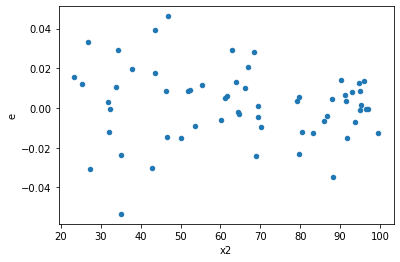

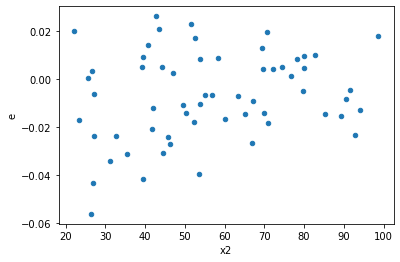

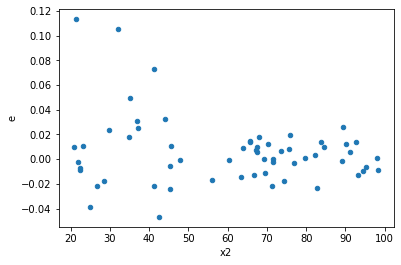

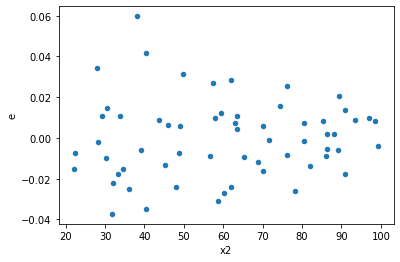

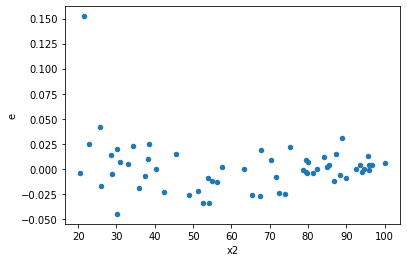

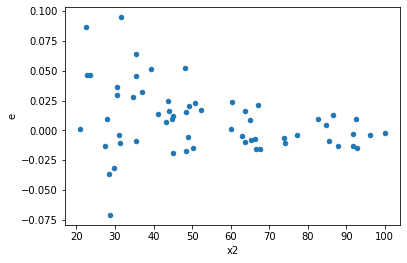

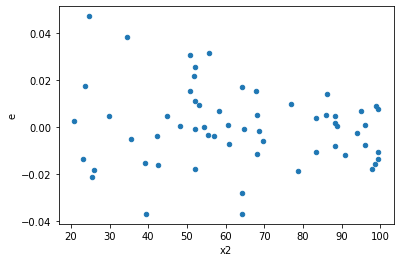

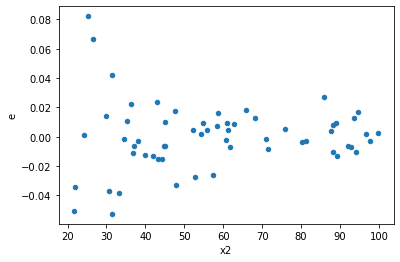

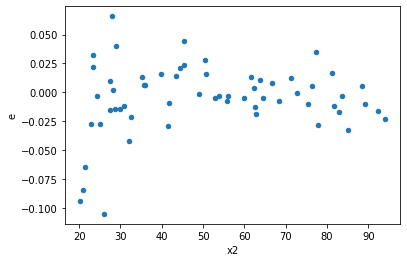

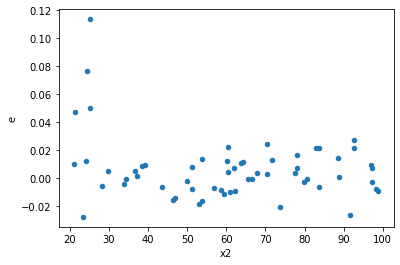

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,21.0,21.0,0.005644648631610191,0.008882177208402817,0.00026879279198143764,0.0004229608194477532,1.5735571490955833,0.30671000078935506,0.8466449996053225,0.15335500039467753,Reject001=1 : Homoscedasticity
17.0,21.0,21.0,0.005564929720009547,0.00894218950049396,0.000264996653333788,0.00042581854764256954,1.6068827371423873,0.2850772403897739,0.857461379805113,0.14253862019488694,Reject001=1 : Homoscedasticity
109.0,21.0,21.0,0.0018068136403581066,0.0035834332556132736,8.603874477895745e-05,0.00017063967883872733,1.9832887994486499,0.12457899865841848,0.9377105006707908,0.06228949932920924,Reject001=1 : Homoscedasticity
126.0,21.0,21.0,0.006132209728572023,0.01092289255449541,0.00029200998707485824,0.0005201377406902576,1.7812327102254815,0.19417599351227777,0.9029120032438611,0.09708799675613888,Reject001=1 : Homoscedasticity
138.0,21.0,21.0,0.01225079693015184,0.012459156584724386,0.0005833712823881829,0.0005932931707011613,1.0170078449394364,0.9695403150027202,0.5152298424986399,0.4847701575013601,Reject001=1 : Homoscedasticity
151.0,21.0,21.0,0.005245071431711369,0.0072779493959509054,0.00024976530627196996,0.000346569018854805,1.3875786994908943,0.45928275888317005,0.770358620558415,0.22964137944158503,Reject001=1 : Homoscedasticity
154.0,21.0,21.0,0.00982258858529216,0.010997996758763123,0.00046774231358534096,0.0005237141313696725,1.1196637895667299,0.79806681287995,0.600966593560025,0.399033406439975,Reject001=1 : Homoscedasticity
159.0,21.0,21.0,0.008414296567886236,0.010994498556657028,0.00040068078894696363,0.0005235475503170014,1.3066450021049076,0.5453806182563408,0.7273096908718296,0.2726903091281704,Reject001=1 : Homoscedasticity
165.0,21.0,21.0,0.011434360256366165,0.012271155835002384,0.000544493345541246,0.0005843407540477326,1.073182544530231,0.8729601874560058,0.5635199062719971,0.4364800937280029,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,0.0068650012371284895,0.004003399240390179,0.0003269048208156424,0.00019063805906619898,0.5831607456584713,0.2247992515608952,Reject001=1 : Homoscedasticity
1.0,21.0,21.0,0.0064587449641716616,0.005793093378944364,0.00030755928400817435,0.0002758615894735411,0.8969379362523462,0.805518078864747,Reject001=1 : Homoscedasticity
2.0,21.0,21.0,0.026052725875322154,0.0036115815076437196,0.0012406059940629596,0.00017198007179255808,0.138625859149146,2.955633045363546e-05,Reject001=0 : Heteroscedasticity
3.0,21.0,21.0,0.005644648631610191,0.008882177208402817,0.00026879279198143764,0.0004229608194477532,1.5735571490955833,0.30671000078935506,Reject001=1 : Homoscedasticity
4.0,21.0,21.0,0.027643026928814377,0.004574928784943704,0.0013163346156578274,0.00021785375166398589,0.16550028318985996,0.00012203874513605819,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,0.022897739366078612,0.0034424194811981724,0.0010903685412418387,0.00016392473719991298,0.15033883590700114,5.703950175303184e-05,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,0.009363788690912892,0.0018975328156395292,0.0004458946995672806,9.035870550664425e-05,0.2026458390161019,0.0005649895646483406,Reject001=0 : Heteroscedasticity
7.0,21.0,21.0,0.013120012066419516,0.004741432587292605,0.0006247624793533103,0.0002257825041567907,0.3613893465409406,0.02394419894930227,Reject001=1 : Homoscedasticity
8.0,21.0,21.0,0.03139408517455278,0.009576229636767315,0.0014949564368834656,0.00045601093508415786,0.30503292526356385,0.008897157803625018,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      594
Reject001=0 : Heteroscedasticity    406
Name: Result_test, dtype: int64